# Nettoyage et analyse du fichier csv owid-co2-world contenant les données de owid-co2 sur le monde entier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#connexion au google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#lecture du csv depuis mon drive partagé
owid_co2_world = pd.read_csv('drive/MyDrive/Projet Mar25 DA - DataScientest/WIP CSV/owid-co2-world.csv')
owid_co2_world.head(20)

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,other_co2_per_capita,other_industry_co2,primary_energy_consumption,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2
0,1750,753279296.0,NaN,NaN,NaN,9.306,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1751,NaN,NaN,NaN,NaN,9.407,0.101,1.088,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1752,NaN,NaN,NaN,NaN,9.505,0.098,1.041,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1753,NaN,NaN,NaN,NaN,9.610,0.105,1.108,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1754,NaN,NaN,NaN,NaN,9.734,0.123,1.281,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1755,NaN,NaN,NaN,NaN,9.793,0.060,0.615,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1756,NaN,NaN,NaN,NaN,9.910,0.116,1.189,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1757,NaN,NaN,NaN,NaN,10.094,0.184,1.857,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1758,NaN,NaN,NaN,NaN,10.216,0.122,1.213,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1759,NaN,NaN,NaN,NaN,10.339,0.122,1.199,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
owid_co2_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               274 non-null    int64  
 1   population                         94 non-null     float64
 2   gdp                                21 non-null     float64
 3   cement_co2                         144 non-null    float64
 4   cement_co2_per_capita              81 non-null     float64
 5   co2                                274 non-null    float64
 6   co2_growth_abs                     273 non-null    float64
 7   co2_growth_prct                    273 non-null    float64
 8   co2_including_luc                  174 non-null    float64
 9   co2_including_luc_growth_abs       173 non-null    float64
 10  co2_including_luc_growth_prct      173 non-null    float64
 11  co2_including_luc_per_capita       84 non-null     float64

In [3]:
owid_co2_world.loc[(owid_co2_world['year'] <= 1950) & (owid_co2_world['population'].notna())]
#on constate qu'avant 1950, nous avons des valeurs de population tous les 10 ans

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,other_co2_per_capita,other_industry_co2,primary_energy_consumption,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2
0,1750,7.532793e+08,NaN,NaN,NaN,9.306,NaN,NaN,NaN,NaN,...,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1760,7.882550e+08,NaN,NaN,NaN,10.514,0.175,1.697,NaN,NaN,...,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,1770,8.279515e+08,NaN,NaN,NaN,13.097,0.317,2.482,NaN,NaN,...,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1780,9.009452e+08,NaN,NaN,NaN,15.879,0.343,2.211,NaN,NaN,...,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,1790,9.422617e+08,NaN,NaN,NaN,20.398,0.535,2.692,NaN,NaN,...,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,1800,9.548924e+08,NaN,NaN,NaN,32.798,5.313,19.331,NaN,NaN,...,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,1810,1.028932e+09,NaN,NaN,NaN,39.492,3.158,8.693,NaN,NaN,...,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,1820,1.065624e+09,1.175114e+12,NaN,NaN,50.733,-0.197,-0.387,NaN,NaN,...,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,1830,1.148205e+09,NaN,NaN,NaN,88.988,22.681,34.206,NaN,NaN,...,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,1840,1.209754e+09,NaN,NaN,NaN,118.809,9.155,8.350,NaN,NaN,...,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Pour remplacer les NaN de la population, on fait une interpolation quadratique pour une continuité fluide entre les valeurs remplies
owid_co2_world['population'] = owid_co2_world['population'].interpolate(method='spline',order=2)
#conversion population en int
owid_co2_world['population'] = owid_co2_world['population'].astype(int)
owid_co2_world.head(11)
owid_co2_world.dtypes

,0
year,int64
population,int64
gdp,float64
cement_co2,float64
cement_co2_per_capita,float64
co2,float64
co2_growth_abs,float64
co2_growth_prct,float64
co2_including_luc,float64
co2_including_luc_growth_abs,float64


In [5]:
owid_co2_world[owid_co2_world['population'].isna()] #il n'y a plus de nan dans population

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,other_co2_per_capita,other_industry_co2,primary_energy_consumption,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2


In [7]:
#remplissage de valeurs pour cement_co2, gdp

owid_co2_world['cement_co2'] = owid_co2_world['cement_co2'].fillna(0)
owid_co2_world['cement_co2_per_capita'] = owid_co2_world['cement_co2_per_capita'].fillna(1000000 * owid_co2_world['cement_co2']/owid_co2_world['population'])
owid_co2_world['gdp'] = owid_co2_world['gdp'].interpolate(method='spline',order=2)
owid_co2_world['gdp'] = owid_co2_world['gdp'].fillna(0)

#co2 per gdp and capita
#si gdp = 0, on met 0, sinon on divise co2 par gdp ; on évite division par 0 ; on multiplie par 1 milliard pour la conversion million de tonnes -> kg
owid_co2_world['co2_per_gdp'] = owid_co2_world['co2_per_gdp'].fillna(owid_co2_world.apply(lambda row : (10**9 * row['co2']/row['gdp']) if row['gdp'] > 0 else 0, axis=1))
#on divise co2 par population, on multiplie par 1000000 pour la conversion million de tonnes -> tonnes
owid_co2_world['co2_per_capita'] = owid_co2_world['co2_per_capita'].fillna(10**6 * owid_co2_world['co2']/owid_co2_world['population'])

#fill nan des valeurs numériques de la première ligne par 0
owid_co2_world.iloc[0] = owid_co2_world.iloc[0].fillna(0)

In [ ]:
#verification des calculs
owid_co2_world.loc[(owid_co2_world['year'] > 1920) & (owid_co2_world['year'] <= 1950), ['year','population','cement_co2','cement_co2_per_capita', 'gdp']]

,year,population,cement_co2,cement_co2_per_capita
171,1921,1942836401,0.130,0.000067
172,1922,1958378610,0.193,0.000099
173,1923,1974483777,0.208,0.000105
174,1924,1991151903,0.216,0.000108
175,1925,2008382988,14.429,0.007184
176,1926,2026313966,14.740,0.007274
177,1927,2045081771,15.448,0.007554
178,1928,2064686402,35.583,0.017234
179,1929,2085127859,36.873,0.017684
180,1930,2106406144,35.561,0.017000


<Axes: xlabel='index', ylabel='0'>

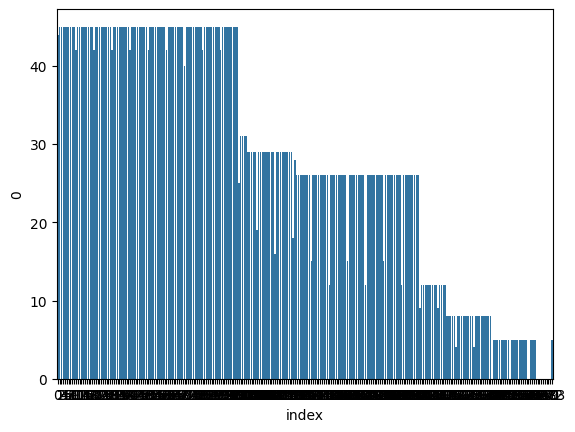

In [ ]:
#barplot du count des valeurs manquantes
na_count = owid_co2_world.isnull().sum(axis = 1).reset_index()

sns.barplot(data=na_count, x='index',y=0)

In [ ]:
#où a t-on des NaN pour growth_abs et growth_prct ?
owid_co2_world[(owid_co2_world['co2_growth_abs'].isna()) | (owid_co2_world['co2_growth_prct'].isna())].head(50)

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2
0,1750,753279296,0.0,NaN,NaN,9.306,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#pour chaque colonne ayant des NaN on regarde les 5 premières lignes ayant des valeurs afin de voir à partir de quelle année on a des valeurs
for c in owid_co2_world.columns[owid_co2_world.isna().any(axis = 0)]:
  print(c)
  display(owid_co2_world.loc[owid_co2_world[c].notna(), ['year',c]].head(5))

co2_including_luc


,year,co2_including_luc
0,1750,0.000
100,1850,2835.459
101,1851,3018.492
102,1852,3065.094
103,1853,3122.835


co2_including_luc_growth_abs


,year,co2_including_luc_growth_abs
0,1750,0.000
101,1851,183.033
102,1852,46.601
103,1853,57.741
104,1854,47.044


co2_including_luc_growth_prct


,year,co2_including_luc_growth_prct
0,1750,0.000
101,1851,6.455
102,1852,1.544
103,1853,1.884
104,1854,1.506


co2_including_luc_per_capita


,year,co2_including_luc_per_capita
0,1750,0.000
100,1850,2.203
110,1860,2.313
120,1870,2.503
130,1880,2.969


co2_including_luc_per_gdp


,year,co2_including_luc_per_gdp
0,1750,0.000
100,1850,1.833
120,1870,1.717
150,1900,1.846
170,1920,1.687


co2_including_luc_per_unit_energy


,year,co2_including_luc_per_unit_energy
0,1750,0.000
215,1965,0.391
216,1966,0.374
217,1967,0.372
218,1968,0.363


co2_per_unit_energy


,year,co2_per_unit_energy
0,1750,0.000
215,1965,0.261
216,1966,0.259
217,1967,0.258
218,1968,0.257


coal_co2_per_capita


,year,coal_co2_per_capita
0,1750,0.012
10,1760,0.013
20,1770,0.016
30,1780,0.018
40,1790,0.022


consumption_co2


,year,consumption_co2
0,1750,0.000
240,1990,22728.988
241,1991,23186.102
242,1992,22528.172
243,1993,22755.787


consumption_co2_per_capita


,year,consumption_co2_per_capita
0,1750,0.000
240,1990,4.266
241,1991,4.279
242,1992,4.092
243,1993,4.070


consumption_co2_per_gdp


,year,consumption_co2_per_gdp
0,1750,0.000
240,1990,0.528
250,2000,0.426
260,2010,0.371
265,2015,0.331


cumulative_cement_co2


,year,cumulative_cement_co2
0,1750,0.000
130,1880,0.000
131,1881,0.000
132,1882,0.001
133,1883,0.001


cumulative_co2_including_luc


,year,cumulative_co2_including_luc
0,1750,0.000
100,1850,2835.459
101,1851,5853.951
102,1852,8919.044
103,1853,12041.880


cumulative_flaring_co2


,year,cumulative_flaring_co2
0,1750,0.000
200,1950,73.624
201,1951,153.500
202,1952,238.863
203,1953,320.212


cumulative_gas_co2


,year,cumulative_gas_co2
0,1750,0.000
132,1882,0.165
133,1883,0.546
134,1884,1.718
135,1885,5.434


cumulative_luc_co2


,year,cumulative_luc_co2
0,1750,0.000
100,1850,2638.611
101,1851,5458.325
102,1852,8315.823
103,1853,11221.421


cumulative_oil_co2


,year,cumulative_oil_co2
0,1750,0.000
105,1855,0.037
106,1856,0.077
107,1857,0.128
108,1858,0.191


energy_per_capita


,year,energy_per_capita
0,1750,0.000
215,1965,12993.681
216,1966,13425.671
217,1967,13641.828
218,1968,14166.963


energy_per_gdp


,year,energy_per_gdp
0,1750,0.000
220,1970,2.605
230,1980,2.439
240,1990,2.220
250,2000,1.843


flaring_co2


,year,flaring_co2
0,1750,0.000
200,1950,73.624
201,1951,79.875
202,1952,85.364
203,1953,81.348


flaring_co2_per_capita


,year,flaring_co2_per_capita
0,1750,0.000
200,1950,0.030
201,1951,0.031
202,1952,0.033
203,1953,0.031


gas_co2


,year,gas_co2
0,1750,0.000
132,1882,0.165
133,1883,0.381
134,1884,1.172
135,1885,3.715


gas_co2_per_capita


,year,gas_co2_per_capita
0,1750,0.000
140,1890,0.008
150,1900,0.007
160,1910,0.014
170,1920,0.022


ghg_excluding_lucf_per_capita


,year,ghg_excluding_lucf_per_capita
0,1750,0.000
100,1850,0.529
110,1860,0.638
120,1870,0.825
130,1880,1.053


ghg_per_capita


,year,ghg_per_capita
0,1750,0.000
100,1850,3.278
110,1860,3.412
120,1870,3.672
130,1880,4.222


land_use_change_co2


,year,land_use_change_co2
0,1750,0.000
100,1850,2638.611
101,1851,2819.714
102,1852,2857.499
103,1853,2905.598


land_use_change_co2_per_capita


,year,land_use_change_co2_per_capita
0,1750,0.000
100,1850,2.050
110,1860,2.066
120,1870,2.105
130,1880,2.368


methane


,year,methane
0,1750,0.000
100,1850,1239.410
101,1851,1244.053
102,1852,1250.690
103,1853,1258.188


methane_per_capita


,year,methane_per_capita
0,1750,0.000
100,1850,0.963
110,1860,0.979
120,1870,1.044
130,1880,1.082


nitrous_oxide


,year,nitrous_oxide
0,1750,0.000
100,1850,144.832
101,1851,147.445
102,1852,150.001
103,1853,152.464


nitrous_oxide_per_capita


,year,nitrous_oxide_per_capita
0,1750,0.000
100,1850,0.113
110,1860,0.122
120,1870,0.126
130,1880,0.173


oil_co2


,year,oil_co2
0,1750,0.000
105,1855,0.037
106,1856,0.040
107,1857,0.051
108,1858,0.062


oil_co2_per_capita


,year,oil_co2_per_capita
0,1750,0.000
110,1860,0.000
120,1870,0.002
130,1880,0.011
140,1890,0.022


other_co2_per_capita


,year,other_co2_per_capita
0,1750,0.0
10,1760,0.0
20,1770,0.0
30,1780,0.0
40,1790,0.0


primary_energy_consumption


,year,primary_energy_consumption
0,1750,0.000
215,1965,43361.367
216,1966,45733.434
217,1967,47411.465
218,1968,50247.539


temperature_change_from_ch4


,year,temperature_change_from_ch4
0,1750,0.000
101,1851,0.000
102,1852,0.001
103,1853,0.001
104,1854,0.002


temperature_change_from_co2


,year,temperature_change_from_co2
0,1750,0.000
101,1851,0.001
102,1852,0.003
103,1853,0.004
104,1854,0.006


temperature_change_from_ghg


,year,temperature_change_from_ghg
0,1750,0.000
101,1851,0.002
102,1852,0.004
103,1853,0.006
104,1854,0.008


temperature_change_from_n2o


,year,temperature_change_from_n2o
0,1750,0.0
101,1851,0.0
102,1852,0.0
103,1853,0.0
104,1854,0.0


total_ghg


,year,total_ghg
0,1750,0.000
100,1850,4219.061
101,1851,4409.311
102,1852,4465.078
103,1853,4532.813


total_ghg_excluding_lucf


,year,total_ghg_excluding_lucf
0,1750,0.000
100,1850,681.081
101,1851,684.198
102,1852,696.189
103,1853,709.859


trade_co2


,year,trade_co2
0,1750,0.0
240,1990,0.0
241,1991,0.0
242,1992,0.0
243,1993,0.0


Nous allons créer un csv contenant uniquement les informations à propos de la relation entre émission de co2 et consommation énergétique, dont on a les infos qu'à partir de 1965

In [ ]:
col_energy = ['year','population','gdp','co2','co2_including_luc']
for c in owid_co2_world.columns:
  if 'energy' in c:
    col_energy.append(c)

print(col_energy)
#on a des valeurs pour l'énergie qu'à partir de 1965
owid_co2_per_energy_world = owid_co2_world.loc[owid_co2_world['year']>=1965, col_energy]
owid_co2_per_energy_world['energy_per_gdp'] = 10**9 * owid_co2_per_energy_world['primary_energy_consumption']/owid_co2_per_energy_world['gdp']
owid_co2_per_energy_world.head()

['year', 'population', 'gdp', 'co2', 'co2_including_luc', 'co2_including_luc_per_unit_energy', 'co2_per_unit_energy', 'energy_per_capita', 'energy_per_gdp', 'primary_energy_consumption']


,year,population,gdp,co2,co2_including_luc,co2_including_luc_per_unit_energy,co2_per_unit_energy,energy_per_capita,energy_per_gdp,primary_energy_consumption
215,1965,3334533717,1.731819e+13,11310.601,16935.701,0.391,0.261,12993.681,2.503805,43361.367
216,1966,3404041107,1.821877e+13,11862.646,17085.477,0.374,0.259,13425.671,2.510237,45733.434
217,1967,3473412894,1.913143e+13,12237.369,17638.225,0.372,0.258,13641.828,2.478197,47411.465
218,1968,3545187239,2.005618e+13,12905.283,18237.686,0.363,0.257,14166.963,2.505339,50247.539
219,1969,3619491592,2.099302e+13,13761.785,19597.758,0.365,0.256,14831.895,2.558050,53701.180


In [ ]:
owid_co2_per_energy_world.tail()

,year,population,gdp,co2,co2_including_luc,co2_including_luc_per_unit_energy,co2_per_unit_energy,energy_per_capita,energy_per_gdp,primary_energy_consumption
269,2019,7811293714,1.221494e+14,37104.273,40891.020,0.250,0.227,21036.396,1.337269,163346.594
270,2020,7887001284,1.185900e+14,35126.527,38565.520,0.245,0.223,20108.234,1.329519,157667.719
271,2021,7954448405,1.260048e+14,36991.734,40544.516,0.245,0.223,20953.705,1.315260,165729.031
272,2022,8021407170,1.301126e+14,37293.836,40834.871,0.242,0.221,21154.355,1.296633,168708.203
273,2023,8091734935,1.279056e+14,37791.570,41416.480,0.241,0.220,21393.711,1.345672,172119.062


In [ ]:
#Création du fichier csv owid_co2_energy
owid_co2_per_energy_world.to_csv('drive/MyDrive/Projet Mar25 DA - DataScientest/Cleaned CSV/owid_co2_per_energy_world.csv', index=False)

In [ ]:
#suppression des colonnes liées à l'energie (pour lesquelles on a des valeurs qu'à partir de 1965) car on les a stocké dans un csv à part
col_energy = []
for c in owid_co2_world.columns:
  if 'energy' in c:
    col_energy.append(c)

owid_co2_world = owid_co2_world.drop(columns=col_energy)
owid_co2_world.head()

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2
0,1750,753279296,0.0,0.0,0.0,9.306,0.000,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1751,756867523,0.0,0.0,0.0,9.407,0.101,1.088,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1752,760435604,0.0,0.0,0.0,9.505,0.098,1.041,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1753,763983539,0.0,0.0,0.0,9.610,0.105,1.108,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1754,767511327,0.0,0.0,0.0,9.734,0.123,1.281,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous allons créer désormais un csv contenant les infos sur les différents types de gaz à effets de serre, pour lesquelles nous avons des données que depuis 1850 environ

In [ ]:
cols = ['year','population','gdp']
for c in owid_co2_world.columns:
  if 'temperature' in c:
    cols.append(c)
  elif 'ghg' in c:
    cols.append(c)
  elif 'luc' in c:
    cols.append(c)
  elif ('co2' in c) and ('consumption' not in c) and ('trade' not in c):
    cols.append(c)
  elif 'nitrous_oxide' in c:
    cols.append(c)
  elif 'methane' in c:
    cols.append(c)


owid_ghg = owid_co2_world.loc[owid_co2_world['year']>=1850, cols]

owid_ghg.isna().sum(axis=0)

,0
year,0
population,0
gdp,0
cement_co2,0
cement_co2_per_capita,0
co2,0
co2_growth_abs,0
co2_growth_prct,0
co2_including_luc,0
co2_including_luc_growth_abs,1


In [ ]:
owid_ghg.columns

Index(['year', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita',
       'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc',
       'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct',
       'co2_including_luc_per_capita', 'co2_including_luc_per_gdp',
       'co2_per_capita', 'co2_per_gdp', 'coal_co2', 'coal_co2_per_capita',
       'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'flaring_co2',
       'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita',
       'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane',
       'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
       'oil_co2', 'oil_co2_per_capita', 'other_co2_per_capita',
       'other_industry_co2', 'temperature_ch

In [ ]:
 #pour la première ligne (1850) on fill les na avec 0
 owid_ghg.loc[owid_ghg['year']==1850] = owid_ghg.loc[owid_ghg['year']==1850].fillna(0)

In [ ]:
#On remplit les valeurs manquantes de gas et oil par une interpolation quadratique, on remet à 0 si < 0
owid_ghg['gas_co2'] = owid_ghg['gas_co2'].interpolate(method='spline',order=2)
owid_ghg['oil_co2'] = owid_ghg['oil_co2'].interpolate(method='spline',order=2)

owid_ghg['gas_co2'] = owid_ghg['gas_co2'].apply(lambda x : 0 if x < 0 else x)
owid_ghg['oil_co2'] = owid_ghg['oil_co2'].apply(lambda x : 0 if x < 0 else x)

owid_ghg['cement_co2'] = owid_ghg['cement_co2'].fillna(0)
owid_ghg['cement_co2_per_capita'] = owid_ghg['cement_co2_per_capita'].fillna(1000000 * owid_ghg['cement_co2']/owid_ghg['population'])
owid_ghg['flaring_co2'] = owid_ghg['flaring_co2'].fillna(0)
owid_ghg['flaring_co2_per_capita'] = owid_ghg['flaring_co2_per_capita'].fillna(1000000 * owid_ghg['flaring_co2']/owid_ghg['population'])

display(owid_ghg[cols].head(30))

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf
100,1850,1287033856,1.546684e+12,0.0,0.0,196.848,11.800,6.376,2835.459,0.000,...,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,4219.061,681.081
101,1851,1294571381,1.561941e+12,0.0,0.0,198.779,1.931,0.981,3018.492,183.033,...,0.000,NaN,NaN,0.0,0.000,0.001,0.002,0.000,4409.311,684.198
102,1852,1301972716,1.577382e+12,0.0,0.0,207.595,8.817,4.435,3065.094,46.601,...,0.000,NaN,NaN,0.0,0.001,0.003,0.004,0.000,4465.078,696.189
103,1853,1309237862,1.593009e+12,0.0,0.0,217.237,9.642,4.645,3122.835,57.741,...,0.000,NaN,NaN,0.0,0.001,0.004,0.006,0.000,4532.813,709.859
104,1854,1316366818,1.608820e+12,0.0,0.0,255.039,37.802,17.401,3169.879,47.044,...,0.000,NaN,NaN,0.0,0.002,0.006,0.008,0.000,4594.583,756.674
105,1855,1323359584,1.624817e+12,0.0,0.0,260.260,5.221,2.047,3138.781,-31.098,...,0.037,NaN,NaN,0.0,0.002,0.007,0.010,0.000,4572.071,764.860
106,1856,1329808695,1.640999e+12,0.0,0.0,278.246,17.986,6.911,3247.130,108.349,...,0.040,NaN,NaN,0.0,0.003,0.008,0.012,0.000,4690.924,787.974
107,1857,1335306688,1.657367e+12,0.0,0.0,281.181,2.935,1.055,3232.267,-14.863,...,0.051,NaN,NaN,0.0,0.003,0.010,0.014,0.000,4683.661,793.283
108,1858,1339853561,1.673919e+12,0.0,0.0,285.548,4.367,1.553,3260.378,28.110,...,0.062,NaN,NaN,0.0,0.004,0.011,0.016,0.001,4718.895,799.812
109,1859,1343449316,1.690657e+12,0.0,0.0,302.572,17.024,5.962,3341.246,80.869,...,0.055,NaN,NaN,0.0,0.004,0.013,0.018,0.001,4810.028,822.376


In [ ]:
#on remplace les Na des colonnes "per_capita" en divisant par la population
cols = ['year','population']
for c in owid_ghg.columns:
  suffix = '_per_capita'
  if suffix in c:
    base = c.replace(suffix,'')
    if base in owid_ghg.columns:
      owid_ghg[c] = owid_ghg[c].fillna(10**6 * owid_ghg[base]/owid_ghg['population'])
      cols.append(base)
      cols.append(c)

owid_ghg['ghg_excluding_lucf_per_capita'] = owid_ghg['ghg_excluding_lucf_per_capita'].fillna(10**6 * owid_ghg['total_ghg_excluding_lucf']/owid_ghg['population'])
owid_ghg['ghg_per_capita'] = owid_ghg['ghg_per_capita'].fillna(10**6 * owid_ghg['total_ghg']/owid_ghg['population'])
owid_ghg['other_co2_per_capita'] = owid_ghg['other_co2_per_capita'].fillna(10**6 * owid_ghg['other_industry_co2']/owid_ghg['population'])
#idem pour per_gdp
owid_ghg['co2_per_gdp'] = owid_ghg['co2_per_gdp'].fillna(10**9 * owid_ghg['co2']/owid_ghg['gdp'])
owid_ghg['co2_including_luc_per_gdp'] = owid_ghg['co2_including_luc_per_gdp'].fillna(10**9 * owid_ghg['co2_including_luc']/owid_ghg['gdp'])

owid_ghg[cols].head(30)

,year,population,cement_co2,cement_co2_per_capita,co2_including_luc,co2_including_luc_per_capita,co2,co2_per_capita,coal_co2,coal_co2_per_capita,...,gas_co2,gas_co2_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita
100,1850,1287033856,0.0,0.0,2835.459,2.203000,196.848,0.153000,196.848,0.153000,...,0.0,0.0,2638.611,2.050000,1239.410,0.963000,144.832,0.113000,0.000,0.000000
101,1851,1294571381,0.0,0.0,3018.492,2.331654,198.779,0.153548,198.779,0.153548,...,0.0,0.0,2819.714,2.178106,1244.053,0.960977,147.445,0.113895,0.000,0.000000
102,1852,1301972716,0.0,0.0,3065.094,2.354192,207.595,0.159447,207.595,0.159447,...,0.0,0.0,2857.499,2.194746,1250.690,0.960612,150.001,0.115211,0.000,0.000000
103,1853,1309237862,0.0,0.0,3122.835,2.385231,217.237,0.165926,217.237,0.165926,...,0.0,0.0,2905.598,2.219305,1258.188,0.961008,152.464,0.116452,0.000,0.000000
104,1854,1316366818,0.0,0.0,3169.879,2.408051,255.039,0.193745,255.039,0.193745,...,0.0,0.0,2914.840,2.214307,1270.683,0.965296,154.799,0.117596,0.000,0.000000
105,1855,1323359584,0.0,0.0,3138.781,2.371828,260.260,0.196666,260.223,0.196638,...,0.0,0.0,2878.521,2.175162,1277.144,0.965077,156.970,0.118615,0.037,0.000028
106,1856,1329808695,0.0,0.0,3247.130,2.441802,278.246,0.209238,278.205,0.209207,...,0.0,0.0,2968.884,2.232565,1285.786,0.966895,158.941,0.119522,0.040,0.000030
107,1857,1335306688,0.0,0.0,3232.267,2.420618,281.181,0.210574,281.130,0.210536,...,0.0,0.0,2951.086,2.210044,1291.693,0.967338,160.678,0.120330,0.051,0.000038
108,1858,1339853561,0.0,0.0,3260.378,2.433384,285.548,0.213119,285.486,0.213073,...,0.0,0.0,2974.829,2.220264,1297.413,0.968324,162.145,0.121017,0.062,0.000046
109,1859,1343449316,0.0,0.0,3341.246,2.487065,302.572,0.225220,302.517,0.225179,...,0.0,0.0,3038.674,2.261845,1306.537,0.972524,163.305,0.121557,0.055,0.000041


In [ ]:
#cols = ['cement_co2', 'gas_co2', 'oil_co2', 'flaring_co2' ,'cumulative_cement_co2', 'cumulative_gas_co2', 'cumulative_oil_co2', 'cumulative_flaring_co2']
#on fill les na des cumulative avec 0
owid_ghg['cumulative_cement_co2'] = owid_ghg['cumulative_cement_co2'].fillna(0)
owid_ghg['cumulative_gas_co2'] = owid_ghg['cumulative_gas_co2'].fillna(0)
owid_ghg['cumulative_oil_co2'] = owid_ghg['cumulative_oil_co2'].fillna(0)
owid_ghg['cumulative_flaring_co2'] = owid_ghg['cumulative_flaring_co2'].fillna(0)

In [ ]:
cumul_cols = ['co2','co2_including_luc', 'coal_co2']
for c in owid_ghg.columns:
  if ('cumul' in c):
    cumul_cols.append(c)

owid_ghg[cumul_cols].head()

,co2,co2_including_luc,coal_co2,cumulative_cement_co2,cumulative_co2,cumulative_co2_including_luc,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,cumulative_other_co2
100,196.848,2835.459,196.848,0.0,4769.853,2835.459,4769.853,0.0,0.0,2638.611,0.0,0.0
101,198.779,3018.492,198.779,0.0,4968.631,5853.951,4968.631,0.0,0.0,5458.325,0.0,0.0
102,207.595,3065.094,207.595,0.0,5176.226,8919.044,5176.226,0.0,0.0,8315.823,0.0,0.0
103,217.237,3122.835,217.237,0.0,5393.463,12041.880,5393.463,0.0,0.0,11221.421,0.0,0.0
104,255.039,3169.879,255.039,0.0,5648.502,15211.758,5648.502,0.0,0.0,14136.262,0.0,0.0


In [ ]:
#Nous devons reset les cumul déjà remplis sur la première ligne (co2, co2_including_luc et coal_co2) pour les comparer aux autres cumul sur la même période
owid_ghg = owid_ghg.reset_index(drop=True)

cumul_co2_start = owid_ghg.loc[0, 'cumulative_co2'] - owid_ghg.loc[0, 'co2']
cumul_coal_start = owid_ghg.loc[0, 'cumulative_coal_co2'] - owid_ghg.loc[0, 'coal_co2']

owid_ghg['cumulative_co2'] = owid_ghg['cumulative_co2'] - cumul_co2_start
owid_ghg['cumulative_coal_co2'] = owid_ghg['cumulative_coal_co2'] - cumul_coal_start

display(owid_ghg[cumul_cols].head())

,co2,co2_including_luc,coal_co2,cumulative_cement_co2,cumulative_co2,cumulative_co2_including_luc,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,cumulative_other_co2
0,196.848,2835.459,196.848,0.0,196.848,2835.459,196.848,0.0,0.0,2638.611,0.0,0.0
1,198.779,3018.492,198.779,0.0,395.626,5853.951,395.626,0.0,0.0,5458.325,0.0,0.0
2,207.595,3065.094,207.595,0.0,603.221,8919.044,603.221,0.0,0.0,8315.823,0.0,0.0
3,217.237,3122.835,217.237,0.0,820.458,12041.880,820.458,0.0,0.0,11221.421,0.0,0.0
4,255.039,3169.879,255.039,0.0,1075.497,15211.758,1075.497,0.0,0.0,14136.262,0.0,0.0


In [ ]:
#nettoyage des NaN pour owid_ghg terminé, on peut créer le csv clean

owid_ghg.to_csv('drive/MyDrive/Projet Mar25 DA - DataScientest/Cleaned CSV/owid_ghg_world.csv', index=False)

Regardons maintenant les colonnes qui n'ont pas de valeurs manquantes dans owid_co2_world pour créer un csv world clean sur la plus longue période possible sans NaN.

In [ ]:
owid_co2_world.columns[owid_co2_world.notna().all()]

Index(['year', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita',
       'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_per_capita',
       'co2_per_gdp', 'coal_co2', 'cumulative_co2', 'cumulative_coal_co2',
       'cumulative_other_co2', 'other_industry_co2'],
      dtype='object')

In [ ]:
owid_co2_world_cleaned = owid_co2_world.loc[:,['year', 'population','gdp','co2', 'co2_growth_abs', 'co2_growth_prct', 'cumulative_co2', 'co2_per_capita', 'co2_per_gdp', 'coal_co2','cumulative_coal_co2']]

owid_co2_world_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 274 non-null    int64  
 1   population           274 non-null    int64  
 2   gdp                  274 non-null    float64
 3   co2                  274 non-null    float64
 4   co2_growth_abs       274 non-null    float64
 5   co2_growth_prct      274 non-null    float64
 6   cumulative_co2       274 non-null    float64
 7   co2_per_capita       274 non-null    float64
 8   co2_per_gdp          274 non-null    float64
 9   coal_co2             274 non-null    float64
 10  cumulative_coal_co2  274 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 23.7 KB


In [ ]:
owid_co2_world_cleaned.columns

Index(['year', 'population', 'gdp', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'cumulative_co2', 'co2_per_capita', 'co2_per_gdp'],
      dtype='object')

In [ ]:
#nettoyage du world terminé, on peut créer le csv clean

owid_co2_world_cleaned.to_csv('drive/MyDrive/Projet Mar25 DA - DataScientest/Cleaned CSV/owid_co2_world.csv', index=False)

In [ ]:
#La ligne suivante nous permet de constater qu'on a des données de trade qu'à partir de 1990. A l'échelle du monde, le trade_co2 n'a pas d'importance.
owid_co2_world[owid_co2_world['trade_co2'].notna()]

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2
0,1750,753279296,0.000000e+00,0.000,0.000,9.306,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
240,1990,5327803075,4.303361e+13,494.369,0.093,22728.988,342.352,1.529,27705.590,365.609,...,1.735,0.042,223.049,0.286,0.648,0.981,0.046,37335.879,27274.096,0.000
241,1991,5418735879,4.435721e+13,508.293,0.094,23186.102,457.114,2.011,28156.088,450.499,...,1.791,0.040,215.616,0.290,0.660,0.998,0.047,37748.945,27719.375,0.000
242,1992,5505989821,4.573134e+13,529.372,0.096,22528.172,-657.930,-2.838,27786.176,-369.912,...,1.673,0.039,216.203,0.294,0.673,1.015,0.049,37381.090,27070.875,0.000
243,1993,5591544841,4.715599e+13,552.208,0.099,22755.787,227.615,1.010,27729.648,-56.529,...,1.648,0.039,216.181,0.297,0.685,1.031,0.050,37327.961,27329.488,0.000
244,1994,5675551281,4.863115e+13,589.438,0.104,22992.947,237.160,1.042,28882.324,1152.676,...,1.630,0.038,216.409,0.300,0.698,1.048,0.051,38563.020,27603.963,0.000
245,1995,5758878997,5.015684e+13,623.497,0.108,23532.084,539.136,2.345,28964.484,82.162,...,1.621,0.039,223.571,0.304,0.710,1.066,0.052,38797.141,28240.766,0.000
246,1996,5842055726,5.178723e+13,636.372,0.109,24258.168,726.086,3.086,30270.709,1306.225,...,1.647,0.038,222.034,0.307,0.724,1.084,0.053,40186.062,29024.330,-0.002
247,1997,5924787787,5.357651e+13,662.360,0.112,24401.906,143.737,0.593,31808.471,1537.761,...,1.648,0.038,223.756,0.310,0.738,1.102,0.054,41658.656,29171.246,0.000
248,1998,6007066714,5.552468e+13,660.075,0.110,24303.777,-98.128,-0.402,30448.242,-1360.228,...,1.645,0.037,220.576,0.314,0.751,1.119,0.055,40217.953,28937.402,0.000


# Ci-dessous quelques graphiques pour des premières analyses

Certains de ces graphs figurent dans le premier rapport.
D'autres n'ont servi qu'à vérifier des données et des nettoyages.

<Figure size 1500x500 with 0 Axes>

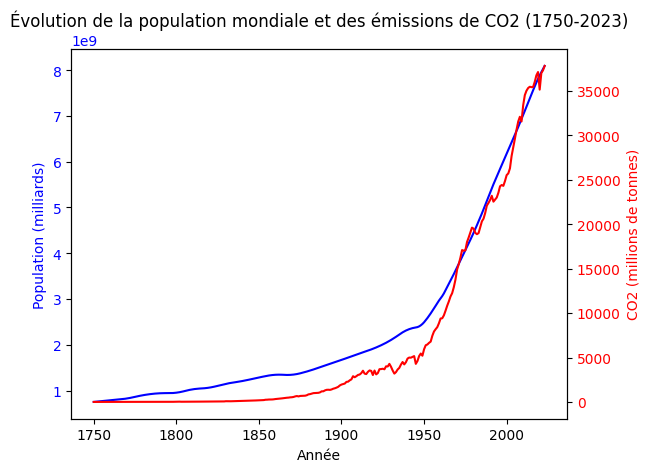

In [ ]:
plt.figure(figsize=(15,5))

fig, ax1 = plt.subplots()

# Premier graphique (population) en bleu
ax1.set_xlabel("Année")
ax1.set_ylabel("Population (milliards)", color="blue")
sns.lineplot(x='year', y='population', data=owid_co2_world, color="blue", ax=ax1)
ax1.tick_params(axis='y', labelcolor="blue")

# Second axe Y pour les émissions de CO2
ax2 = ax1.twinx()
ax2.set_ylabel("CO2 (millions de tonnes)", color="red")
sns.lineplot(x='year', y='co2', data=owid_co2_world, color="red", ax=ax2)
ax2.tick_params(axis='y', labelcolor="red")

# Titre général
plt.title("Évolution de la population mondiale et des émissions de CO2 (1750-2023)")
plt.show();

<Figure size 1500x500 with 0 Axes>

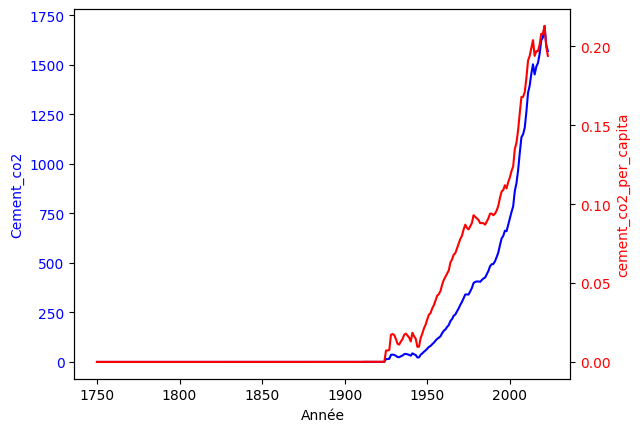

In [ ]:

plt.figure(figsize=(15,5))

fig, ax1 = plt.subplots()

# Premier graphique (population) en bleu
ax1.set_xlabel("Année")
ax1.set_ylabel("Cement_co2", color="blue")
sns.lineplot(x='year', y='cement_co2', data=owid_co2_world, color="blue", ax=ax1)
ax1.tick_params(axis='y', labelcolor="blue")

# Second axe Y pour les émissions de CO2
ax2 = ax1.twinx()
ax2.set_ylabel("cement_co2_per_capita", color="red")
sns.lineplot(x='year', y='cement_co2_per_capita', data=owid_co2_world, color="red", ax=ax2)
ax2.tick_params(axis='y', labelcolor="red")

plt.show();

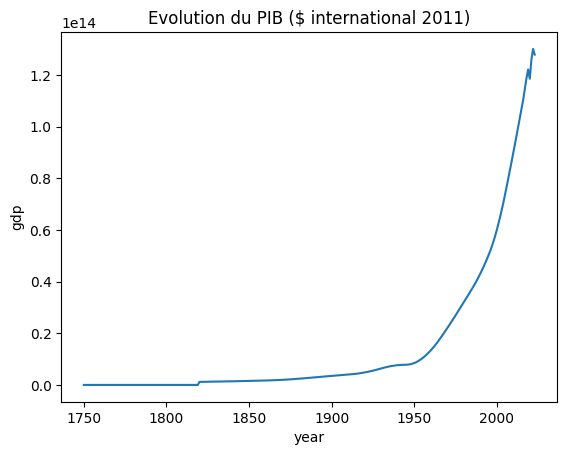

In [ ]:
sns.lineplot(x='year', y='gdp', data=owid_co2_world);
plt.title("Evolution du PIB ($ international 2011)");

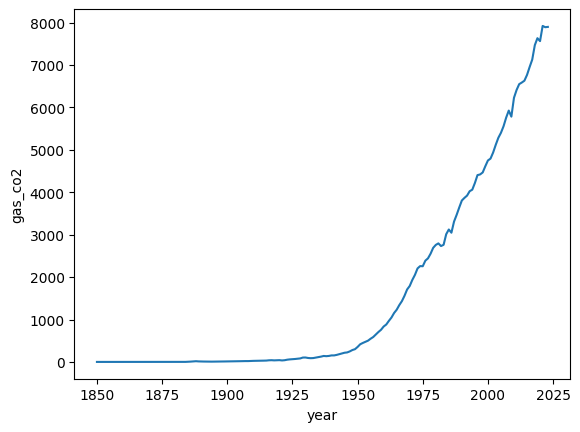

In [ ]:
sns.lineplot(x='year', y='gas_co2', data=owid_ghg);

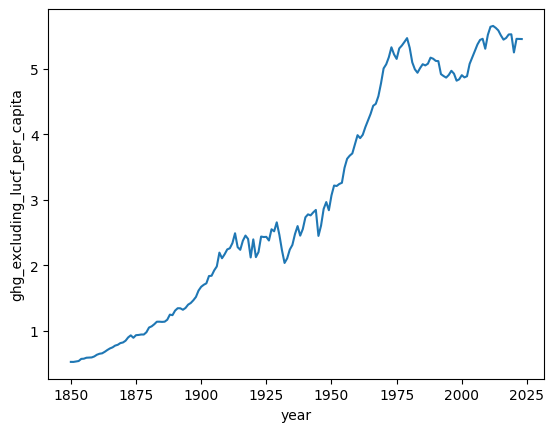

In [ ]:
sns.lineplot(x='year', y='ghg_excluding_lucf_per_capita', data=owid_ghg);

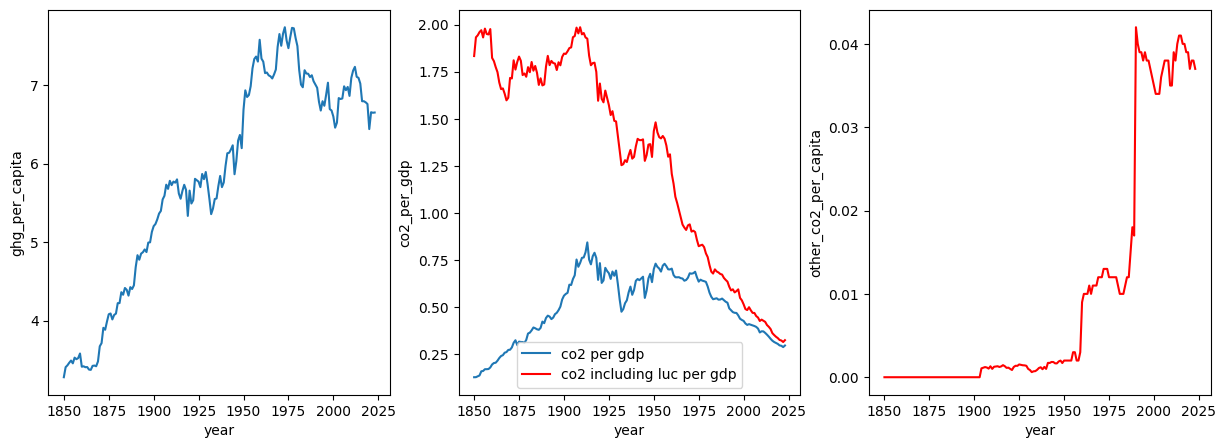

In [ ]:

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.lineplot(x='year', y='ghg_per_capita', data=owid_ghg);
plt.subplot(1,3,2)
sns.lineplot(x='year', y='co2_per_gdp', data=owid_ghg, label='co2 per gdp');
sns.lineplot(x='year', y='co2_including_luc_per_gdp', data=owid_ghg, color='red', label='co2 including luc per gdp');
plt.legend();
plt.subplot(1,3,3)
sns.lineplot(x='year', y='other_co2_per_capita', data=owid_ghg, color='red');
